<a href="https://colab.research.google.com/github/electrarm/ipynb/blob/main/circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [7]:
import requests
import zipfile
from pathlib import Path

# 1. Code for one circle

In [8]:
pi = np.pi

def plot_circle(r=None) :

  theta = np.linspace(0,2*pi,100)

  if r is None:
    r = int(input("Enter the radius:"))

  x = r*np.cos(theta)
  y = r*np.sin(theta)

  max_x = np.max(x)
  max_y = np.max(y)

  norm_x = x/max_x
  norm_y = y/max_y

  plt.figure(figsize = (3,5))
  plt.plot(norm_x,norm_y)

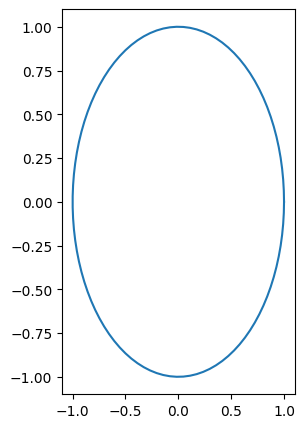

In [9]:
plot_circle(5)

Make two circles

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def plot_circles(r1=None, r2=None, cx1=None, cy1=None, cx2=None, cy2=None , save_path = None):
    theta = np.linspace(0, 2 * pi, 100)


    if r1 is None:
        r1 = int(input("Enter the radius for circle one: "))
    if cx1 is None or cy1 is None:
        cx1, cy1 = map(int, input("Enter the center coordinates for circle one (e.g., 0 0): ").split())


    if r2 is None:
        r2 = int(input("Enter the radius for circle two: "))
    if cx2 is None or cy2 is None:
        cx2, cy2 = map(int, input("Enter the center coordinates for circle two (e.g., 2 3): ").split())

    x1 = cx1 + r1 * np.cos(theta)
    y1 = cy1 + r1 * np.sin(theta)


    x2 = cx2 + r2 * np.cos(theta)
    y2 = cy2 + r2 * np.sin(theta)


    plt.figure(figsize=(6, 6))
    plt.plot(x1, y1, label=f"Circle 1 (r={r1}, center=({cx1}, {cy1}))", color="red")
    plt.plot(x2, y2, label=f"Circle 2 (r={r2}, center=({cx2}, {cy2}))", color="blue")

    # Equal aspect ratio to keep circles round
    plt.gca().set_aspect('equal')


    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()


    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    if save_path:
      plt.savefig(save_path)
      plt.close()
    else:
      plt.show()





Make the directory wich we are gonna save the images and make the images

In [11]:
import os
from random import randint,uniform

In [12]:
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "circles"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"Creating {image_path} directory")
    image_path.mkdir(parents=True, exist_ok=True)


Creating data/circles directory


In [13]:
circle_data_list = []

for i in range(3000):

    r1 = np.random.uniform(0.01, 10)
    r2 = np.random.uniform(0.01, 10)

    cx1 = np.random.uniform(-10, 10)
    cy1 = np.random.uniform(-10, 10)

    cx2 = np.random.uniform(-10, 10)
    cy2 = np.random.uniform(-10, 10)

    file_path = os.path.join(image_path, f"circle_{i+1}.png")

    plot_circles(r1, r2, cx1, cy1, cx2, cy2, file_path)


    circle_data_list.append([r1, r2, cx1, cy1, cx2, cy2])





In [15]:
import zipfile
import os
import numpy as np


zip_filename = "/content/circles_images.zip"

with zipfile.ZipFile(zip_filename, 'w') as zipf:

    for i in range(3000):
        file_path = os.path.join(str(image_path), f"circle_{i+1}.png")
        zipf.write(file_path, os.path.basename(file_path))

print(f"Images are zipped into {zip_filename}")



np.save(os.path.join(str(image_path), "circle_data.npy"), np.array(circle_data_list))


data = np.load(os.path.join(str(image_path), "circle_data.npy"))
print(data.shape)



Images are zipped into /content/circles_images.zip
(3000, 6)


Download the images at my pc

In [16]:
from google.colab import files
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Become one with the data.

So essentially what we have is some radius and some (x,y) coordinates . Let's see the lenght of the and their type . (they are python and not  numpy list so we have to convert them in order to process them. To use them at he model i will make them tensors)

In [17]:
circle_data_array = np.array(circle_data_list,dtype = np.float32)
print(circle_data_array.shape)
r1 = circle_data_array[:,0]
x1 = circle_data_array[:,1]
y1 = circle_data_array[:,2]
r2 = circle_data_array[:,3]
x2 = circle_data_array[:,4]
y2 = circle_data_array[:,5]

print(r1[:10],len(r1),r1.shape,circle_data_array.dtype)

(3000, 6)
[4.5601935 6.3499026 2.1089847 8.252413  6.379     5.175563  9.596988
 9.042758  4.51533   4.944849 ] 3000 (3000,) float32


Turn them into tensor to use them at the model

In [18]:
circle_data_tensor = torch.from_numpy(circle_data_array)

r1 = circle_data_tensor[:,0]
x1 = circle_data_tensor[:,1]
y1 = circle_data_tensor[:,2]
r2 = circle_data_tensor[:,3]
x2 = circle_data_tensor[:,4]
y2 = circle_data_tensor[:,5]


print(r1[:10],type(r1),r1.dtype)

tensor([4.5602, 6.3499, 2.1090, 8.2524, 6.3790, 5.1756, 9.5970, 9.0428, 4.5153,
        4.9448]) <class 'torch.Tensor'> torch.float32


Make the labels and the ratios for the images

In [19]:
labels = []
overlap_ratios = []

for data in circle_data_array:
    r1, r2, x1, y1, x2, y2 = data


    D = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


    R = r1 + r2


    if R != 0:
      if D == 0 and np.abs(r1-r2):
        overlap_ratio = 1
      elif D <= np.abs(r1-r2):
        overlap_ratio = 1
      else:
        overlap_ratio = D/R
    else:
        overlap_ratio = 0

    overlap_ratios.append(overlap_ratio)


    if overlap_ratio < 1:
        labels.append(1)
    else:
        labels.append(0)


labels = np.array(labels, dtype=np.float32)
overlap_ratios = np.array(overlap_ratios, dtype=np.float32)

print(overlap_ratios.shape)

(3000,)


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prepare the data for the model.


In [21]:
# Αποθήκευση των δεδομένων
final_data = np.concatenate((circle_data_array, labels.reshape(-1, 1), overlap_ratios.reshape(-1, 1)), axis=1)

# Αποθήκευση σε CSV και Torch tensor
columns = ['r1', 'r2', 'cx1', 'cy1', 'cx2', 'cy2', 'label', 'overlap_ratio']
df = pd.DataFrame(final_data, columns=columns)

# Αποθήκευση αρχείων
np.save('data/circle_data_with_labels.npy', final_data)
df.to_csv('data/circle_data_with_labels.csv', index=False)
torch.save(torch.tensor(final_data, dtype=torch.float32), 'data/circles/circle_data_with_labels.pt')




Train - Test split for the binary model classification ( overlap or not)

In [22]:
from sklearn.preprocessing import StandardScaler

# ορίζω τι είναι input με x Και τι ειναι Ouput με y
X = final_data[:,:-2]
y = final_data[:,-2]



# make a transform so i can process beytter the data for radii and coordinates
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train test split the above

X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)


In [23]:
#be sure that they are tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


Model 1 Overlap Classifier

In [24]:

class overlap_classifier(nn.Module):
  def __init__(self):
     super().__init__()
     self.layer_1 = nn.Linear(in_features =6,out_features= 16)

     self.layer_2 = nn.Linear(in_features =16,out_features= 8)

     self.layer_3 = nn.Linear(in_features =8,out_features= 1)

     self.relu = nn.ReLU()

     self.sigmoid = nn.Sigmoid()


  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = overlap_classifier().to(device)




loss function and optimizer

In [25]:


optimizer = torch.optim.Adam(params = model_1.parameters(),lr = 0.1)

loss_fn1 = nn.L1Loss()

In [26]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

Train and evaluation

In [27]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train_tensor).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn1(y_logits,y_train)

  acc = accuracy_fn(y_true = y_train,y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_logis = model_1(X_test_tensor).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logis))
    test_loss = loss_fn1(test_logis,y_test)
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.48560 | Acc: 39.88% | Test Loss: 0.74873 | Test Acc: 64.83%
Epoch: 100 | Loss: 0.19371 | Acc: 89.92% | Test Loss: 0.14278 | Test Acc: 91.50%
Epoch: 200 | Loss: 0.10466 | Acc: 40.00% | Test Loss: 0.11500 | Test Acc: 92.33%
Epoch: 300 | Loss: 0.08787 | Acc: 90.96% | Test Loss: 0.11446 | Test Acc: 37.83%
Epoch: 400 | Loss: 0.08698 | Acc: 91.46% | Test Loss: 0.09545 | Test Acc: 37.83%
Epoch: 500 | Loss: 0.10941 | Acc: 91.71% | Test Loss: 0.12734 | Test Acc: 91.33%
Epoch: 600 | Loss: 0.10606 | Acc: 92.08% | Test Loss: 0.10077 | Test Acc: 37.83%
Epoch: 700 | Loss: 0.08690 | Acc: 92.29% | Test Loss: 0.09995 | Test Acc: 37.83%
Epoch: 800 | Loss: 0.08312 | Acc: 39.88% | Test Loss: 0.09694 | Test Acc: 37.83%
Epoch: 900 | Loss: 0.08354 | Acc: 39.88% | Test Loss: 0.09875 | Test Acc: 37.83%


Graph to see our model

Model for overlap ratio prediction

In [31]:
class overlap_calculator(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(6, 16)


    self.layer_2 = nn.Linear(16, 16)


    self.layer_3 = nn.Linear(16, 1)

    self.relu = nn.ReLU()

  def forward(self, x):

      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = overlap_calculator().to(device)

In [32]:
loss_fn2 = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(params = model_2.parameters(),lr = 0.1)


In [33]:
y_ratio = final_data[:,-1]


X_train , X_test , y_train_ratio , y_test_ratio = train_test_split(X_scaled,y_ratio,test_size = 0.2,random_state = 42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_ratio = torch.tensor(y_train_ratio, dtype=torch.float32)
y_test_ratio = torch.tensor(y_test_ratio, dtype=torch.float32)

In [34]:
import torch


torch.manual_seed(42)

epoch_count = []
train_losses = []
test_losses = []
mae_train_list = []
mae_test_list = []


num_epochs = 1000


for epoch in range(num_epochs):

    model_2.train()

    y_pred = model_2(X_train_tensor).squeeze()

    loss = loss_fn2(y_pred, y_train_ratio)
    mae_train = torch.mean(torch.abs(y_pred - y_train_ratio)).item()


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_tensor).squeeze()
        test_loss = loss_fn2(test_pred, y_test_ratio)


        mae_test = torch.mean(torch.abs(test_pred - y_test_ratio)).item()


    epoch_count.append(epoch)
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)




    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | MAE: {mae_test:.5f}")



Epoch: 0 | Train Loss: 0.92034 | Test Loss: 0.56396 | MAE: 0.89512
Epoch: 100 | Train Loss: 0.04341 | Test Loss: 0.11481 | MAE: 0.25587
Epoch: 200 | Train Loss: 0.02731 | Test Loss: 0.11146 | MAE: 0.23943
Epoch: 300 | Train Loss: 0.03096 | Test Loss: 0.12349 | MAE: 0.26930
Epoch: 400 | Train Loss: 0.01776 | Test Loss: 0.09162 | MAE: 0.20895
Epoch: 500 | Train Loss: 0.01494 | Test Loss: 0.09832 | MAE: 0.21012
Epoch: 600 | Train Loss: 0.02668 | Test Loss: 0.12135 | MAE: 0.26529
Epoch: 700 | Train Loss: 0.01197 | Test Loss: 0.09862 | MAE: 0.21275
Epoch: 800 | Train Loss: 0.01355 | Test Loss: 0.10349 | MAE: 0.22438
Epoch: 900 | Train Loss: 0.01279 | Test Loss: 0.09445 | MAE: 0.20693


Call for an image  with th real values and the model values

Enter the value of r1 between 0.1-10: 3
Enter the value of r2 between 0.1-10: 6
Enter the value of cx1 between -10 and +10: -2
Enter the value of cy1 between -10 and +10: 3
Enter the value of cx2 between -10 and +10: 4
Enter the value of cy2 between -10 and +10: 5

--- Results ---
Actual Overlap: Yes | Predicted: Yes
Actual Overlap Ratio: 0.7027 | Predicted Ratio: 1.3910


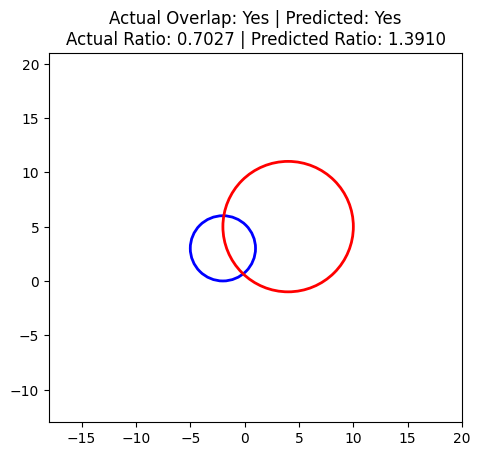

In [35]:
import numpy as np
import torch
import matplotlib.pyplot as plt


r1 = float(input("Enter the value of r1 between 0.1-10: "))
r2 = float(input("Enter the value of r2 between 0.1-10: "))
x1 = float(input("Enter the value of cx1 between -10 and +10: "))
y1 = float(input("Enter the value of cy1 between -10 and +10: "))
x2 = float(input("Enter the value of cx2 between -10 and +10: "))
y2 = float(input("Enter the value of cy2 between -10 and +10: "))


def real_overlap_and_ratio(r1, r2, x1, y1, x2, y2):
    D = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    R = r1 + r2

    if R != 0:
        if D == 0 and r1 == r2:
            overlap_ratio = 1
        elif D <= np.abs(r1 - r2):
            overlap_ratio = 1
        else:
            overlap_ratio = D / R
    else:
        overlap_ratio = 0

    label = 1 if overlap_ratio < 1 else 0

    return label, overlap_ratio


def predict(r1, r2, x1, y1, x2, y2):
    real_overlap, real_overlap_ratio = real_overlap_and_ratio(r1, r2, x1, y1, x2, y2)

    input_data = torch.tensor([r1, r2, x1, y1, x2, y2], dtype=torch.float32).unsqueeze(0).to(device)


    model_1.eval()
    with torch.inference_mode():
        y_logits = model_1(input_data).squeeze()
        predicted_overlap = torch.round(torch.sigmoid(y_logits)).item()


    model_2.eval()
    with torch.inference_mode():
        predicted_overlap_ratio = model_2(input_data).squeeze().item()


    print("\n--- Results ---")
    print(f"Actual Overlap: {'Yes' if real_overlap == 1 else 'No'} | Predicted: {'Yes' if predicted_overlap == 1 else 'No'}")
    print(f"Actual Overlap Ratio: {real_overlap_ratio:.4f} | Predicted Ratio: {predicted_overlap_ratio:.4f}")


    fig, ax = plt.subplots()
    circle1 = plt.Circle((x1, y1), r1, color='blue', fill=False, linewidth=2, label='Circle 1')
    circle2 = plt.Circle((x2, y2), r2, color='red', fill=False, linewidth=2, label='Circle 2')
    ax.add_artist(circle1)
    ax.add_artist(circle2)

    plt.xlim(min(x1, x2) - max(r1, r2) - 10, max(x1, x2) + max(r1, r2) + 10)
    plt.ylim(min(y1, y2) - max(r1, r2) - 10, max(y1, y2) + max(r1, r2) + 10)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.title(f"Actual Overlap: {'Yes' if real_overlap == 1 else 'No'} | Predicted: {'Yes' if predicted_overlap == 1 else 'No'}\n"
              f"Actual Ratio: {real_overlap_ratio:.4f} | Predicted Ratio: {predicted_overlap_ratio:.4f}")
    plt.show()


predict(r1, r2, x1, y1, x2, y2)

